In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [2]:
train_df = pd.read_csv('drive/MyDrive/IITP/sohyun/creditcard_prediction/data/train.csv') # Train
val_df = pd.read_csv('drive/MyDrive/IITP/sohyun/creditcard_prediction/data/val.csv') # Validation
test_df = pd.read_csv('drive/MyDrive/IITP/sohyun/creditcard_prediction/data/test.csv') # Test

In [ ]:
# 데이터 분포 확인
# train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
# val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
# plt.show()

In [3]:
# validation set 사기 거래 비율
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


In [22]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID']) # Input Data
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label
test_x = test_df.drop(columns=['ID'])
submit = pd.read_csv('drive/MyDrive/IITP/sohyun/creditcard_prediction/data/sample_submission.csv')

Normalize

In [ ]:
# case 1 - standardscaler
from sklearn.preprocessing import StandardScaler
scaler_n = StandardScaler()
scaler_n.fit(train_x)
scaled = scaler_n.transform(train_x) # 결과 ndarray
train_x_scaleN = pd.DataFrame(scaled, columns = train_x.columns) # 확인 : train_x_scaleN.mean(), train_x_scaleN.var()

scaled = scaler_n.transform(val_x)
val_x_scaleN = pd.DataFrame(scaled, columns = val_x.columns)

scaled = scaler_n.transform(test_x)
test_x_scaleN = pd.DataFrame(scaled, columns = test_x.columns)

In [ ]:
# case 2 - minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()
scaler_m.fit(train_x)

train_x_scaleM = pd.DataFrame(scaler_m.transform(train_x), columns = train_x.columns)
val_x_scaleM = pd.DataFrame(scaler_m.transform(val_x), columns = val_x.columns)
test_x_scaleM = pd.DataFrame(scaler_m.transform(test_x), columns = test_x.columns)

차원 축소

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # n_componenets : 투영할 차원의 수
pca.fit(train_x_scaleN)
train_x_pca_scaleN = pd.DataFrame(pca.transform(train_x_scaleN), columns = train_x.columns)
val_x_pca_scaleN = pd.DataFrame(pca.transform(val_x_scaleN), columns = val_x.columns)
test_x_pca_scaleN = pd.DataFrame(pca.transform(test_x_scaleN), columns = test_x.columns)

pca2 = PCA()
pca2.fit(train_x_scaleM)
train_x_pca_scaleM = pd.DataFrame(pca2.transform(train_x_scaleM), columns = train_x.columns)
val_x_pca_scaleM = pd.DataFrame(pca2.transform(val_x_scaleM), columns = val_x.columns)
test_x_pca_scaleM = pd.DataFrame(pca2.transform(test_x_scaleM), columns = test_x.columns)

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2).fit_transform(train_x_scaleN)
# train_x_tsne_scaleN = pd.

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# x_embedded = TSNE(n_components=2, perplexity=30, learning_rate=10, n_iter=1000).fit_transform(val_x_scaleN)
# plt.figure(figsize = (12, 8))
# scatter = plt.scatter(x_embedded[:,0], x_embedded[:,1], s=10, c=val_y, cmap='rainbow')
# plt.savefig(f"./normalization_standardscaler")

In [24]:
x_t = train_df.drop(columns=['ID']) # Input Data
x_v = val_df.drop(columns=['ID']) # Input Data
y_v = val_df['Class'] # Label
x_t['Class'] = 0
tv = pd.concat([x_t, x_v]) # train + validation dataset (train label은 0으로 우선 넣음)
y_tv = tv['Class']
x_tv = tv.drop(columns=['Class'])

In [ ]:
# case 1 - standardscaler
from sklearn.preprocessing import StandardScaler
scaler_n = StandardScaler()
scaler_n.fit(x_tv)
scaled = scaler_n.transform(x_tv) # 결과 ndarray
x_scaleN = pd.DataFrame(scaled, columns = x_tv.columns) 

# case 2 - minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()
scaler_m.fit(x_tv)

x_scaleM = pd.DataFrame(scaler_m.transform(x_tv), columns = x_tv.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(3) # n_componenets : 투영할 차원의 수
pca.fit(x_scaleN)
x_pca_scaleN = pd.DataFrame(pca.transform(x_scaleN))

pca2 = PCA(3) # n_componenets : 투영할 차원의 수
pca2.fit(x_scaleM)
x_pca_scaleM = pd.DataFrame(pca2.transform(x_scaleM))


In [ ]:
from pandas.core.frame import DataFrame
DataFrame(y_tv[70:])

In [25]:
anomal_idx = list(y_tv == 1)
anomal_x = x_pca_scaleN.loc[anomal_idx, :]
# anomal = x_pca_scaleN.loc[anomal_idx, :] # anomal dataset (30 * 31)
# anomal_x = anomal.drop(columns=['Class'])

NameError: ignored

<Figure size 432x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

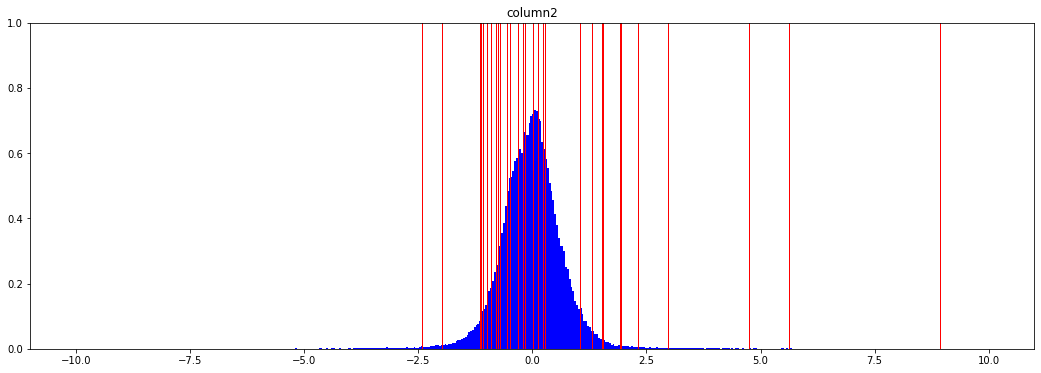

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,3) :
  plt.clf()
  plt.figure(figsize=(18,6))  
  plt.hist(x_pca_scaleN.loc[:,i], bins = 500, color='b', range = [-10,10], density=True, stacked = True)
  plt.hist(x_pca_scaleN.loc[anomal_idx, i], bins = 500, color = 'r', density=True, stacked = True)
    
  plt.ylim(0,1)
  plt.title(f"column{i}")
  # plt.show()
  plt.savefig(f"column{i}")

In [ ]:
# import seaborn as sns
# # sns.distplot(x_pca_scaleN.loc[:,0], color = "b")
# sns.distplot(x_pca_scaleN.loc[:,1], color = "green")
# # sns.distplot(x_pca_scaleN.loc[:,2], color = "yellow")
# # sns.distplot(x_pca_scaleN.loc[anomal, 0], color = "r")
# sns.distplot(x_pca_scaleN.loc[anomal, 1], color = "r", ylim = (0,1))
# # sns.distplot(x_pca_scaleN.loc[anomal, 2], color = "r")

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
plt.xlim(0,40)
# plt.axis(-20, 30)
ax.scatter(x_pca_scaleN.loc[:,0], x_pca_scaleN.loc[:,1], x_pca_scaleN.loc[:,2], c=y_tv, marker='o', s=15, cmap='rainbow')

In [27]:


anomal_idx = list(val_y == 1)
# anomal_valid = val_x_pca_scaleN.loc[anomal_idx, :]

# val_x

In [67]:
one_anomal_idx = anomal_idx.index(True)
one_anomal = np.tile(False, len(anomal_idx))
one_anomal[one_anomal_idx] = True

In [74]:
anomal_idx[71]

True

<Figure size 432x288 with 0 Axes>

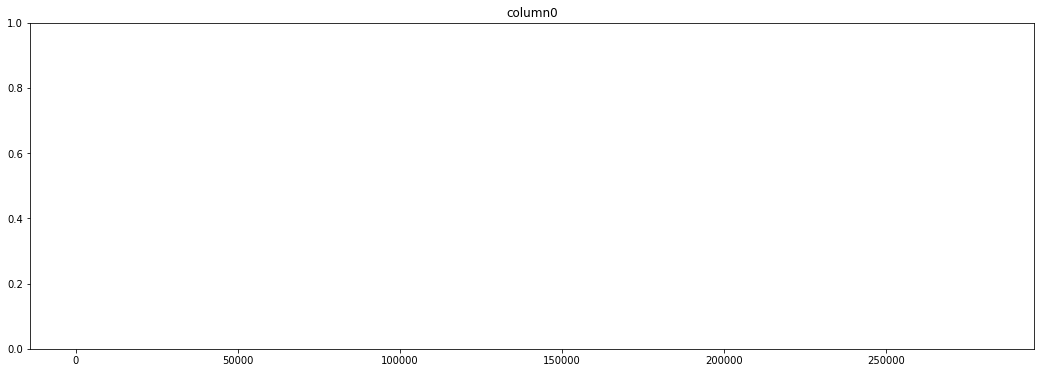

<Figure size 432x288 with 0 Axes>

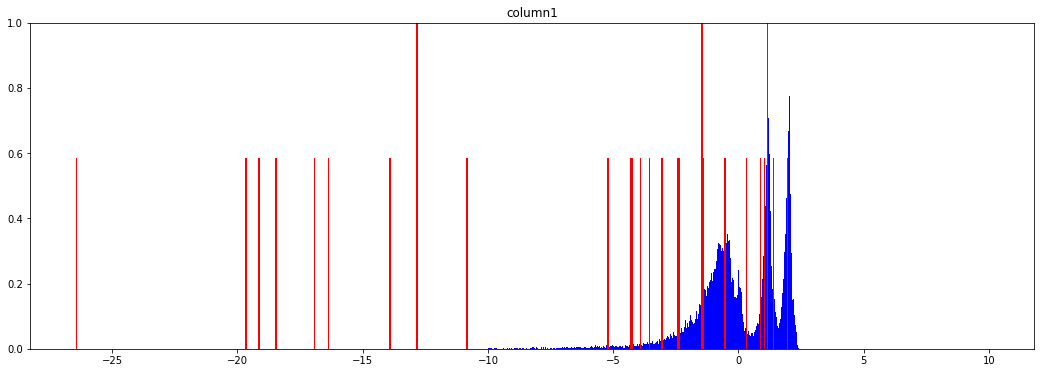

<Figure size 432x288 with 0 Axes>

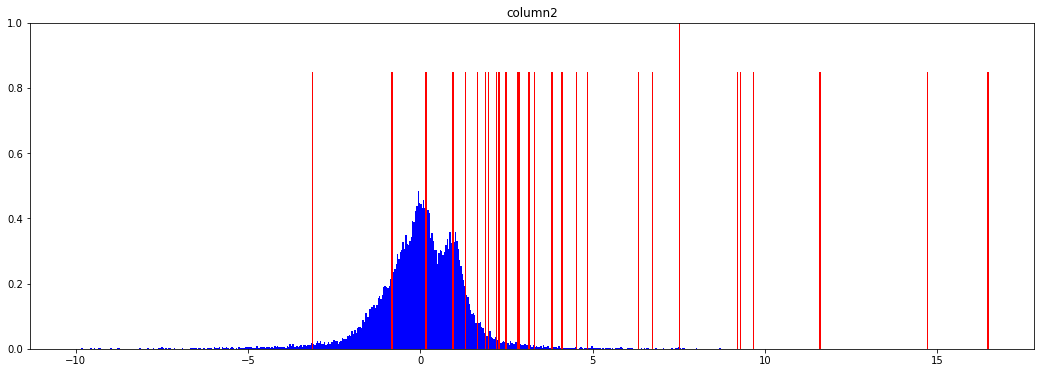

<Figure size 432x288 with 0 Axes>

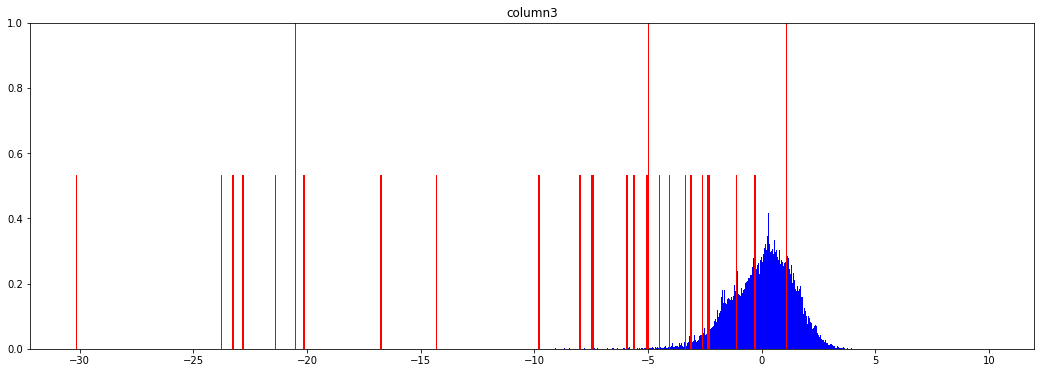

<Figure size 432x288 with 0 Axes>

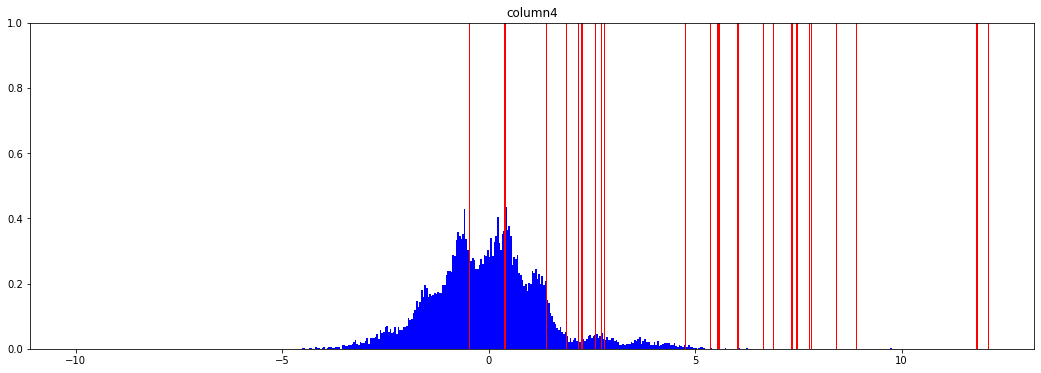

<Figure size 432x288 with 0 Axes>

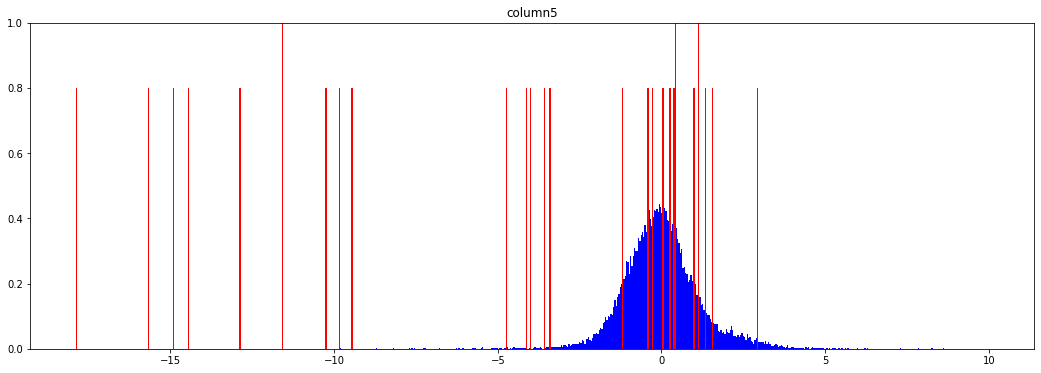

<Figure size 432x288 with 0 Axes>

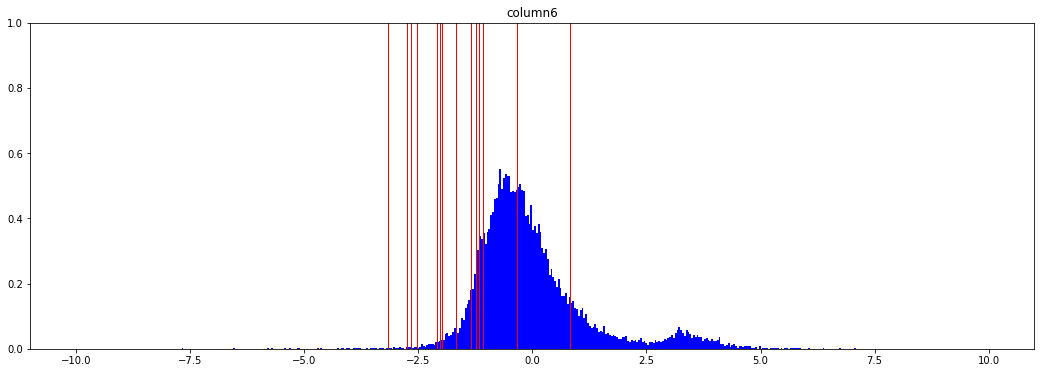

<Figure size 432x288 with 0 Axes>

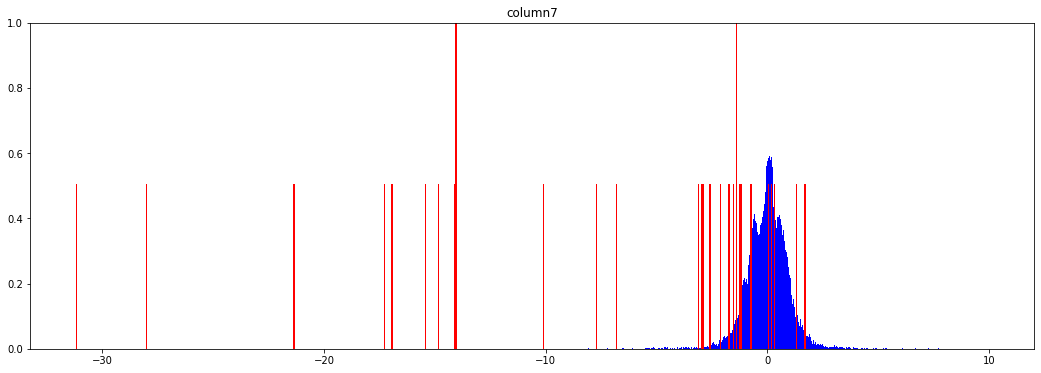

<Figure size 432x288 with 0 Axes>

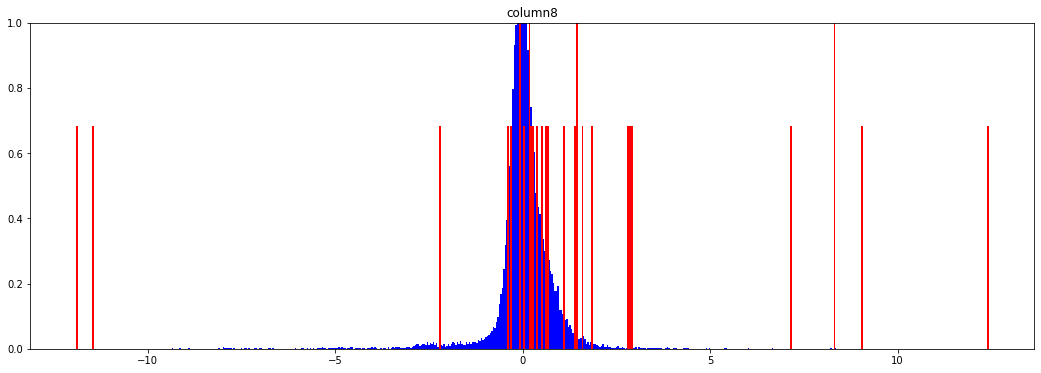

<Figure size 432x288 with 0 Axes>

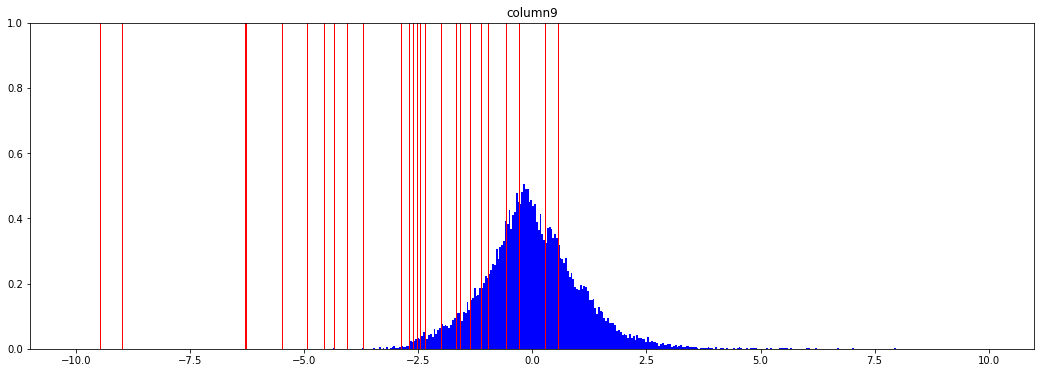

<Figure size 432x288 with 0 Axes>

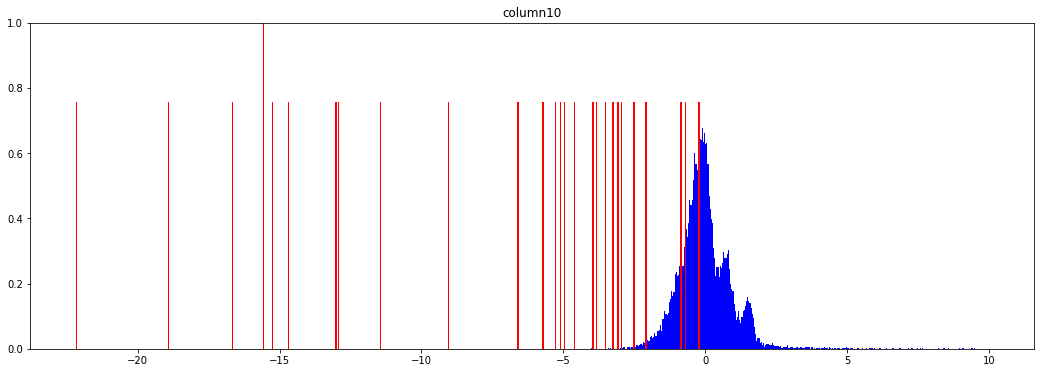

<Figure size 432x288 with 0 Axes>

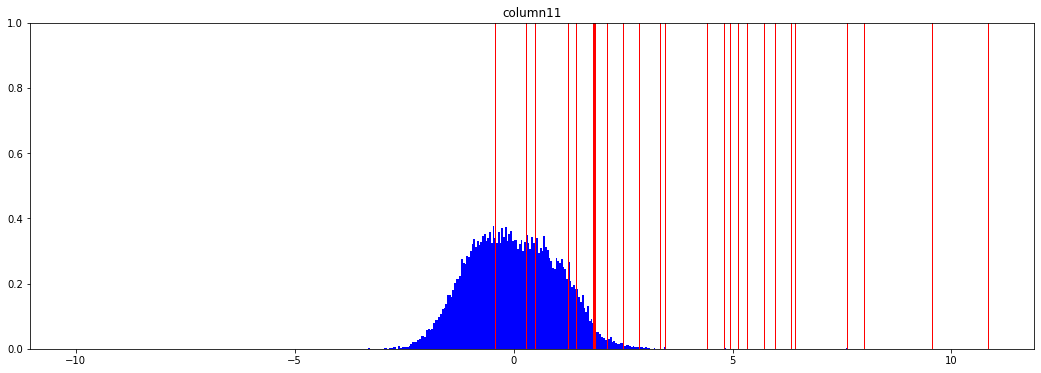

<Figure size 432x288 with 0 Axes>

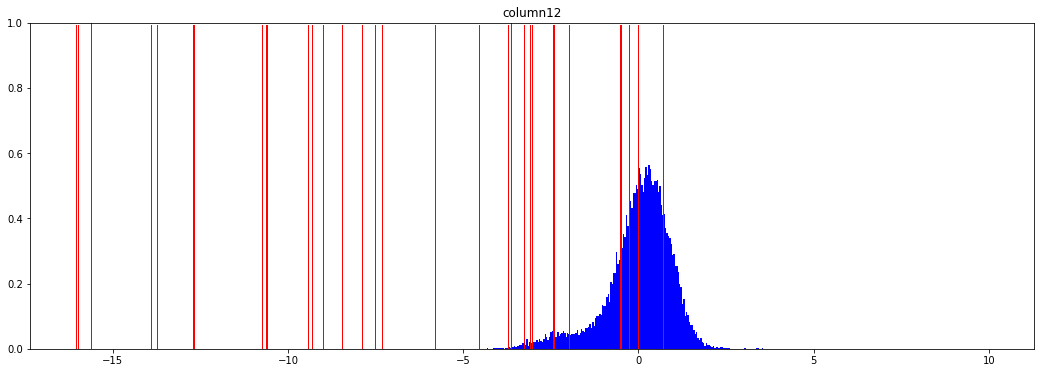

<Figure size 432x288 with 0 Axes>

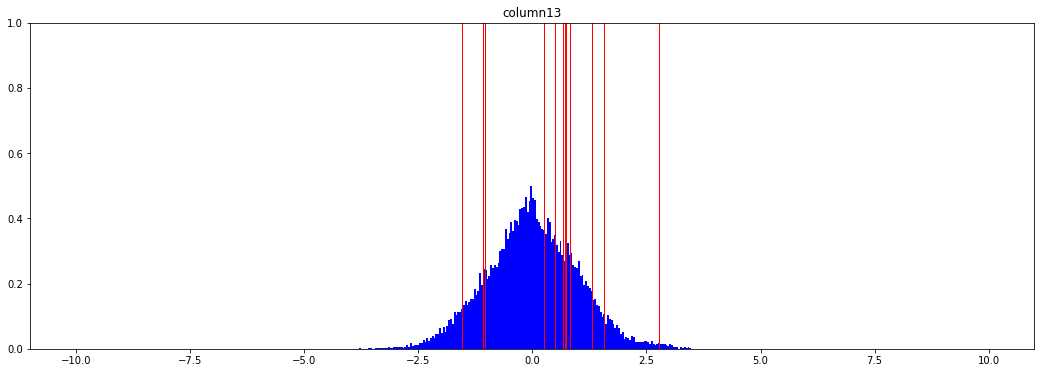

<Figure size 432x288 with 0 Axes>

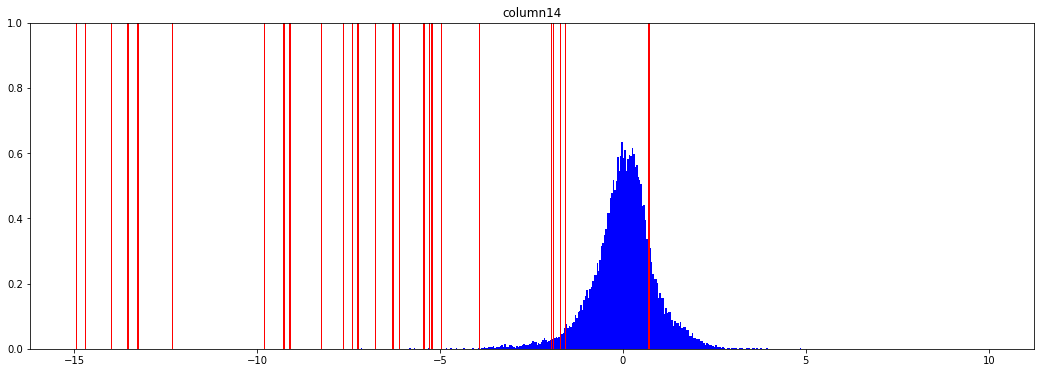

<Figure size 432x288 with 0 Axes>

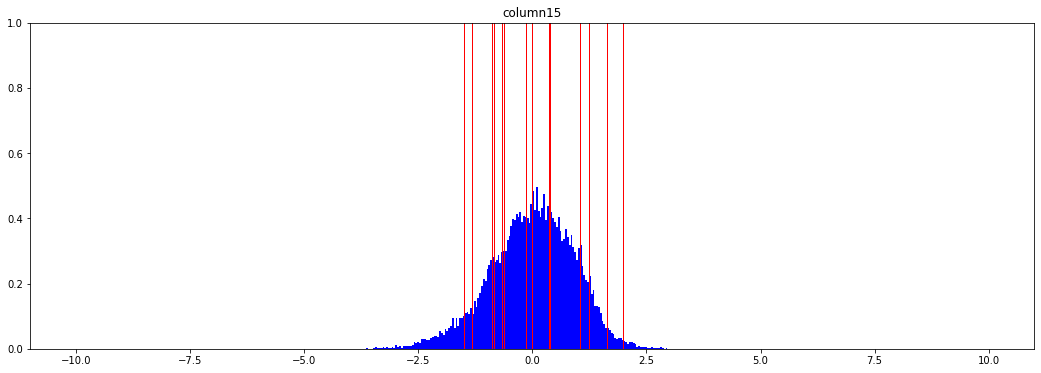

<Figure size 432x288 with 0 Axes>

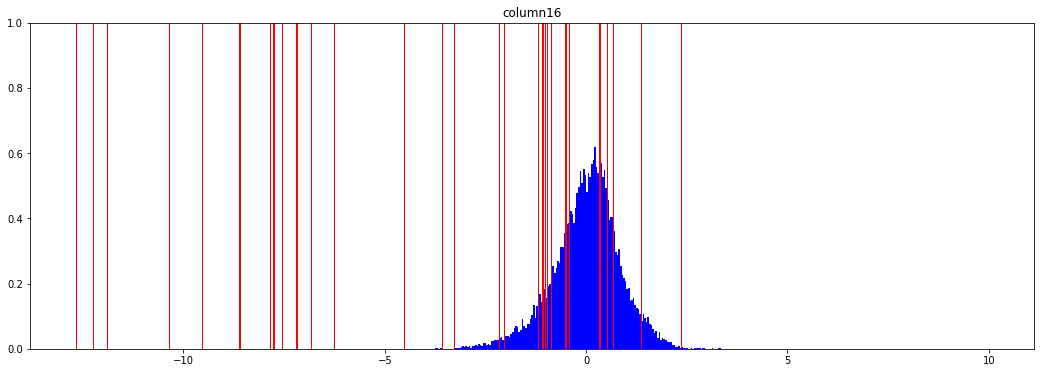

<Figure size 432x288 with 0 Axes>

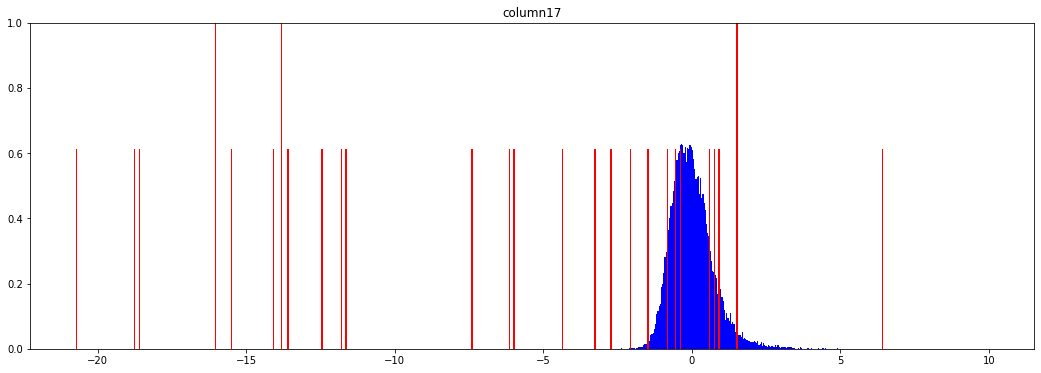

<Figure size 432x288 with 0 Axes>

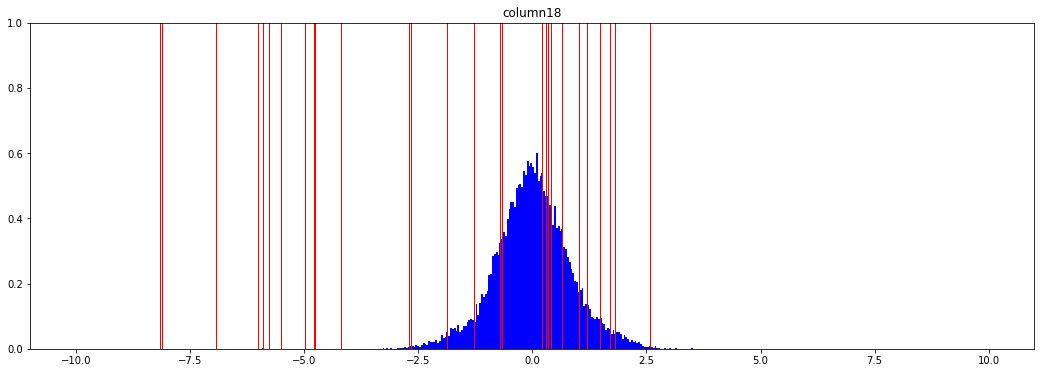

<Figure size 432x288 with 0 Axes>

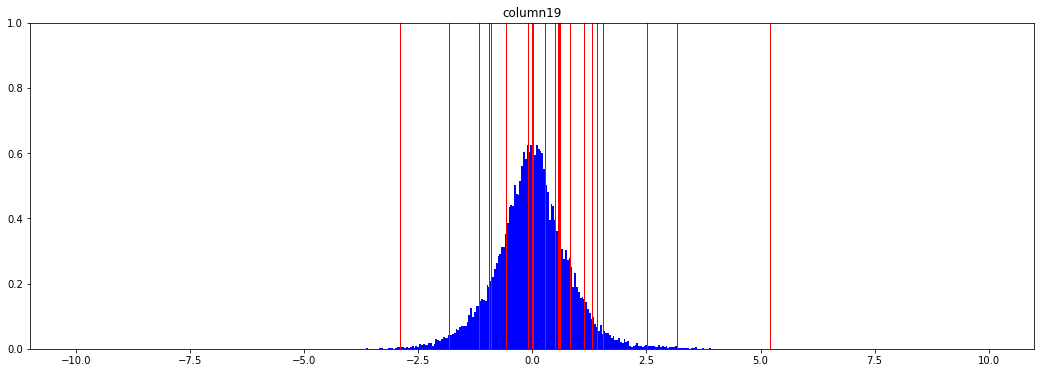

<Figure size 432x288 with 0 Axes>

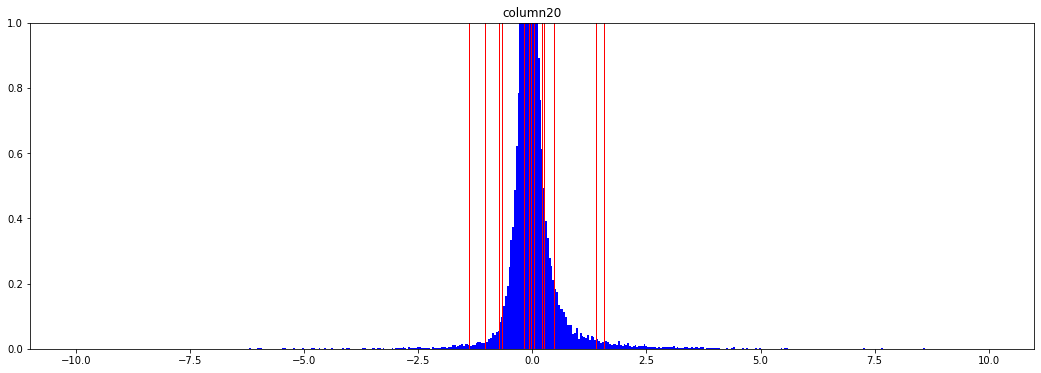

<Figure size 432x288 with 0 Axes>

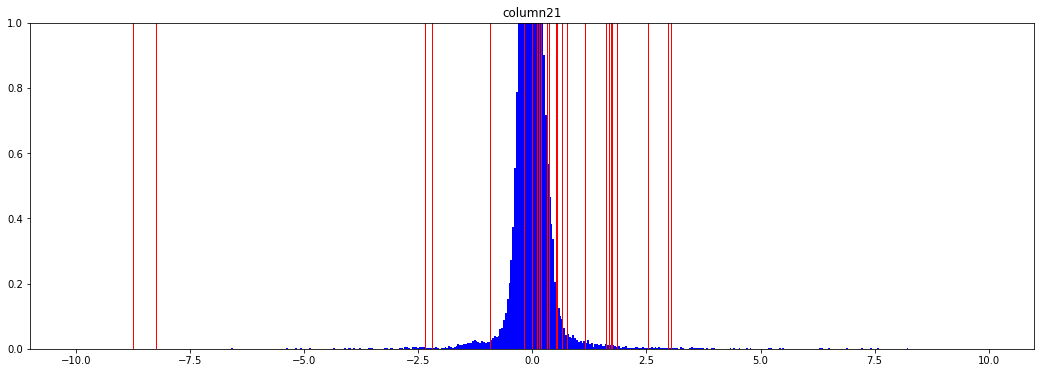

<Figure size 432x288 with 0 Axes>

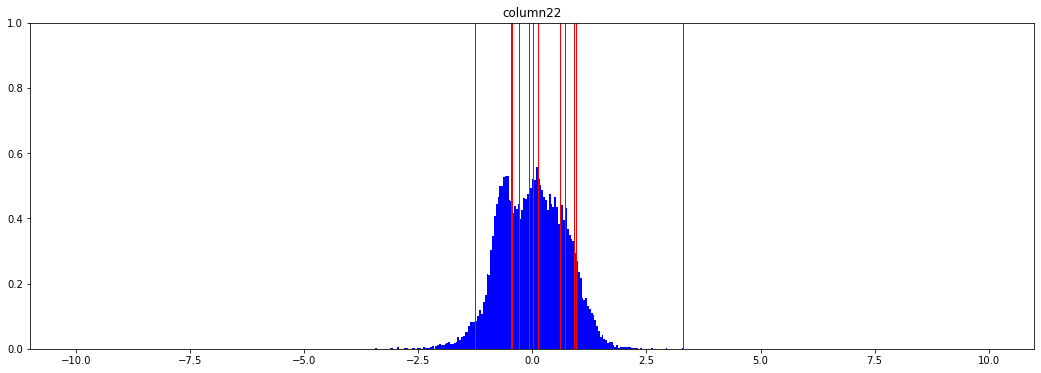

<Figure size 432x288 with 0 Axes>

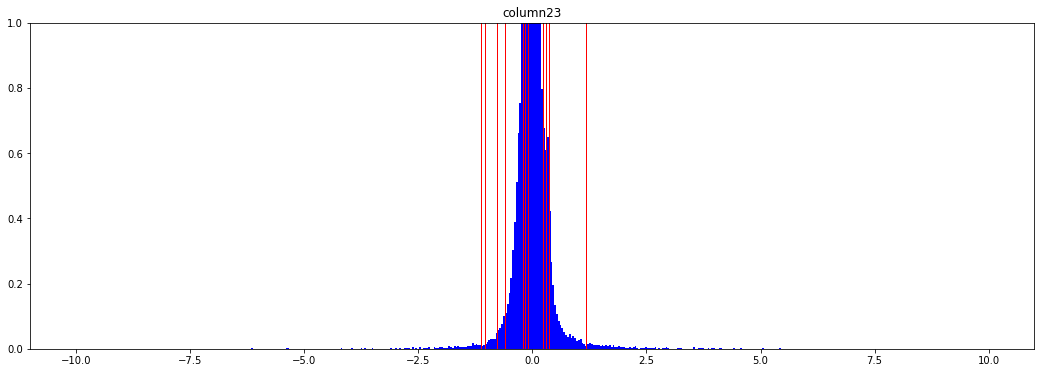

<Figure size 432x288 with 0 Axes>

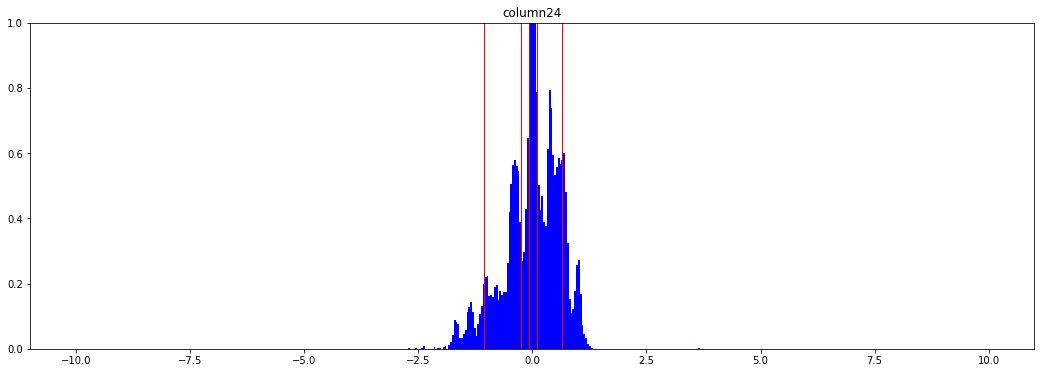

<Figure size 432x288 with 0 Axes>

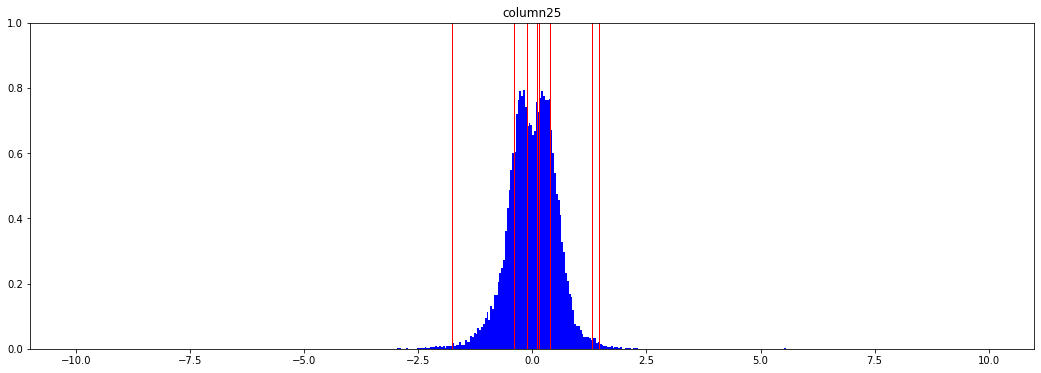

<Figure size 432x288 with 0 Axes>

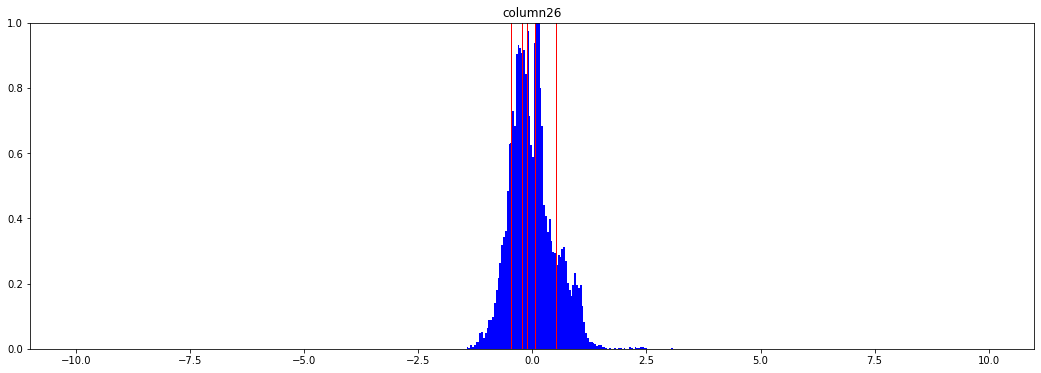

<Figure size 432x288 with 0 Axes>

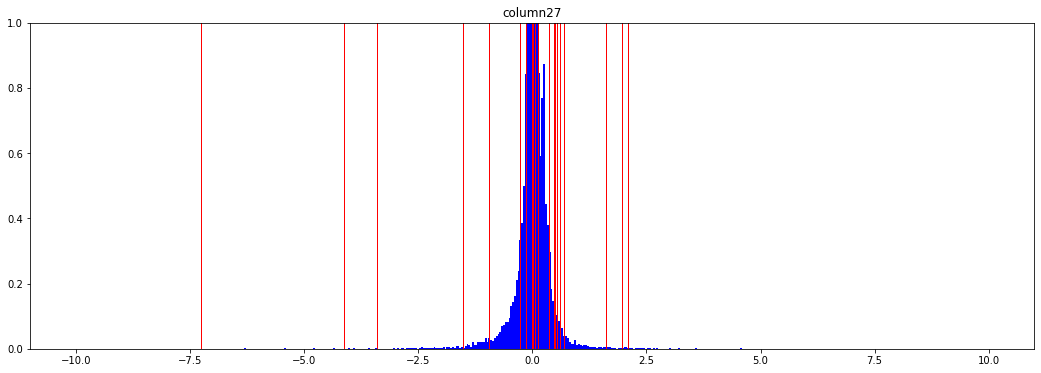

<Figure size 432x288 with 0 Axes>

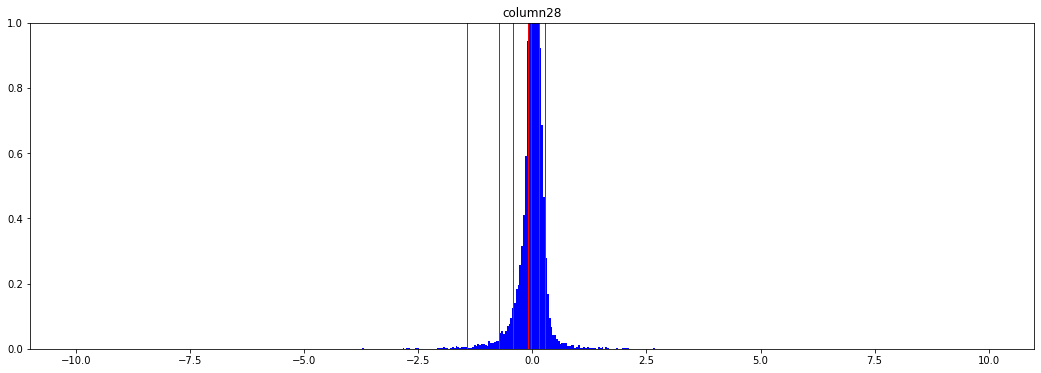

<Figure size 432x288 with 0 Axes>

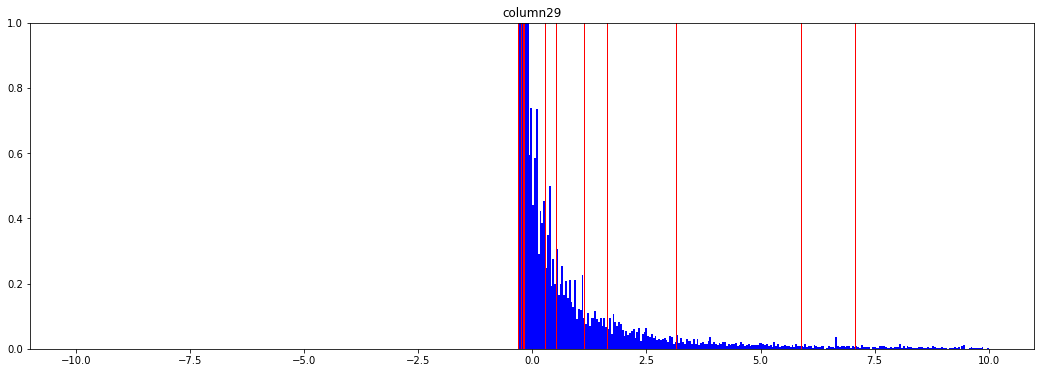

<Figure size 432x288 with 0 Axes>

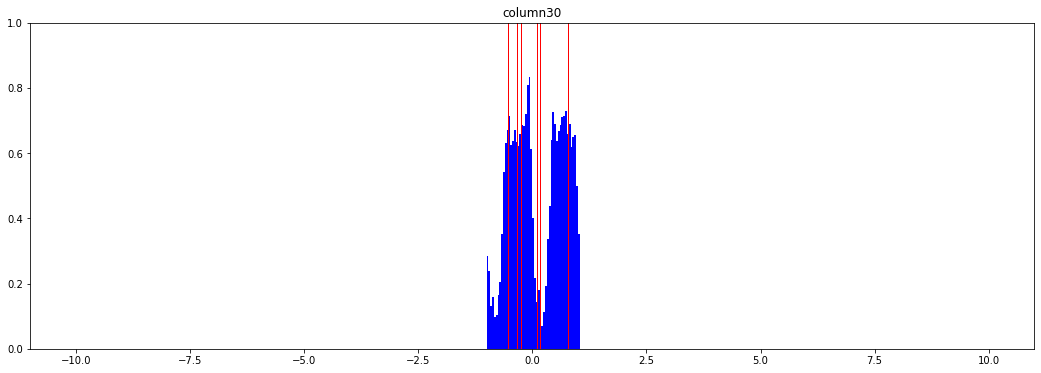

In [82]:
# pal = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 
#        'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'Pastel1', 'Pastel2', 
#        'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

pal = ['black', 'grey', 'lightcoral', 'salmon', 'orangered',
       'darkorange', 'moccasin', 'khaki', 'beige', 'gold',
       'yellow', 'darkolivegreen', 'chartreuse', 'palegreen',
       'forestgreen', 'limegreen', 'seagreen', 'turquoise', 'cadetblue',
       'skyblue', 'dodgerblue', 'cornflowerblue', 'midnightblue', 'blue',
       'plum','indigo', 'deeppink', 'orchid', 'hotpink']

import matplotlib.pyplot as plt

for i in range(0,31) :
  plt.clf()
  plt.figure(figsize=(18,6))  
  plt.hist(val_df.iloc[:,i], bins = 500, color='b', range = [-10,10], density=True, stacked = True)
  # plt.hist(val_df.iloc[anomal_idx[anomal_idx == True], i], bins = 500, color = pal[i], density=True, stacked = True)
  # plt.hist(val_df.iloc[one_anomal, i], bins = 500, color = "r", density=True, stacked = True)
  plt.hist(val_df.iloc[anomal_idx, i], bins = 500, color = "r", density=True, stacked = True)
  
  plt.ylim(0,1)
  plt.title(f"column{i}")
  plt.show()
  # plt.savefig(f"column{i}")

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

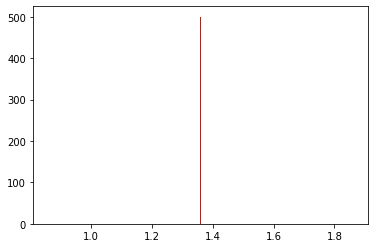

In [81]:
plt.hist(val_df.iloc[one_anomal, 5], bins = 500, color = "r", density=True, stacked = True)

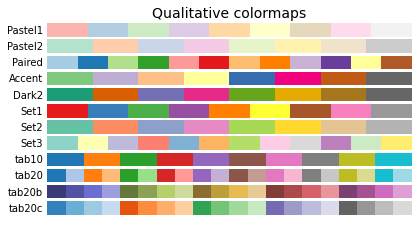

In [40]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

V1


<Figure size 432x288 with 0 Axes>

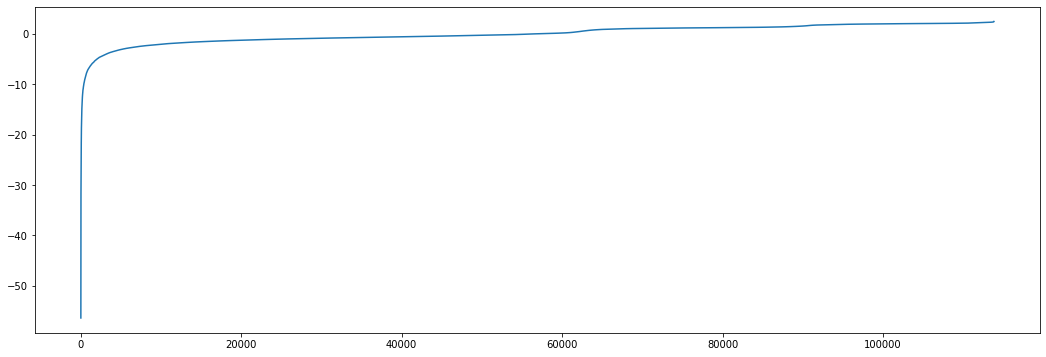

In [5]:
import matplotlib.pyplot as plt
for i in range(1, 31) :
  c = "V" + str(i)
  print(c)
  plt.clf()
  plt.figure(figsize = (18, 6))
  k = train_df[[c]].values.flatten().tolist()
  k.sort()
  plt.plot(k)
  # plt.hist(val_x_pca_scaleN[[c]].values.flatten().tolist(), bins=200)
  # plt.hist(anomal_valid[[c]].values.flatten().tolist(), bins = 500, color = 'r', stacked = True)
  # plt.xlim(-2, 4)
  plt.show()
  break

